In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [17]:
toyota = pd.read_csv('C:/Users/Ashwini/Desktop/ExcelRAssignments/Multi Linear Regression/ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [19]:
toyota1 = toyota.loc[:,['Price','Age_08_04', 'KM','HP','cc', 'Doors', 'Quarterly_Tax', 'Weight']]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,69,1025
1432,10845,72,19000,86,1300,3,69,1015
1433,8500,71,17016,86,1300,3,69,1015
1434,7250,70,16916,86,1300,3,69,1015


In [20]:
data = toyota1.Price
data

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [21]:
toyota1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [22]:
toyota1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.109363,0.302618
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.626134,1.000000


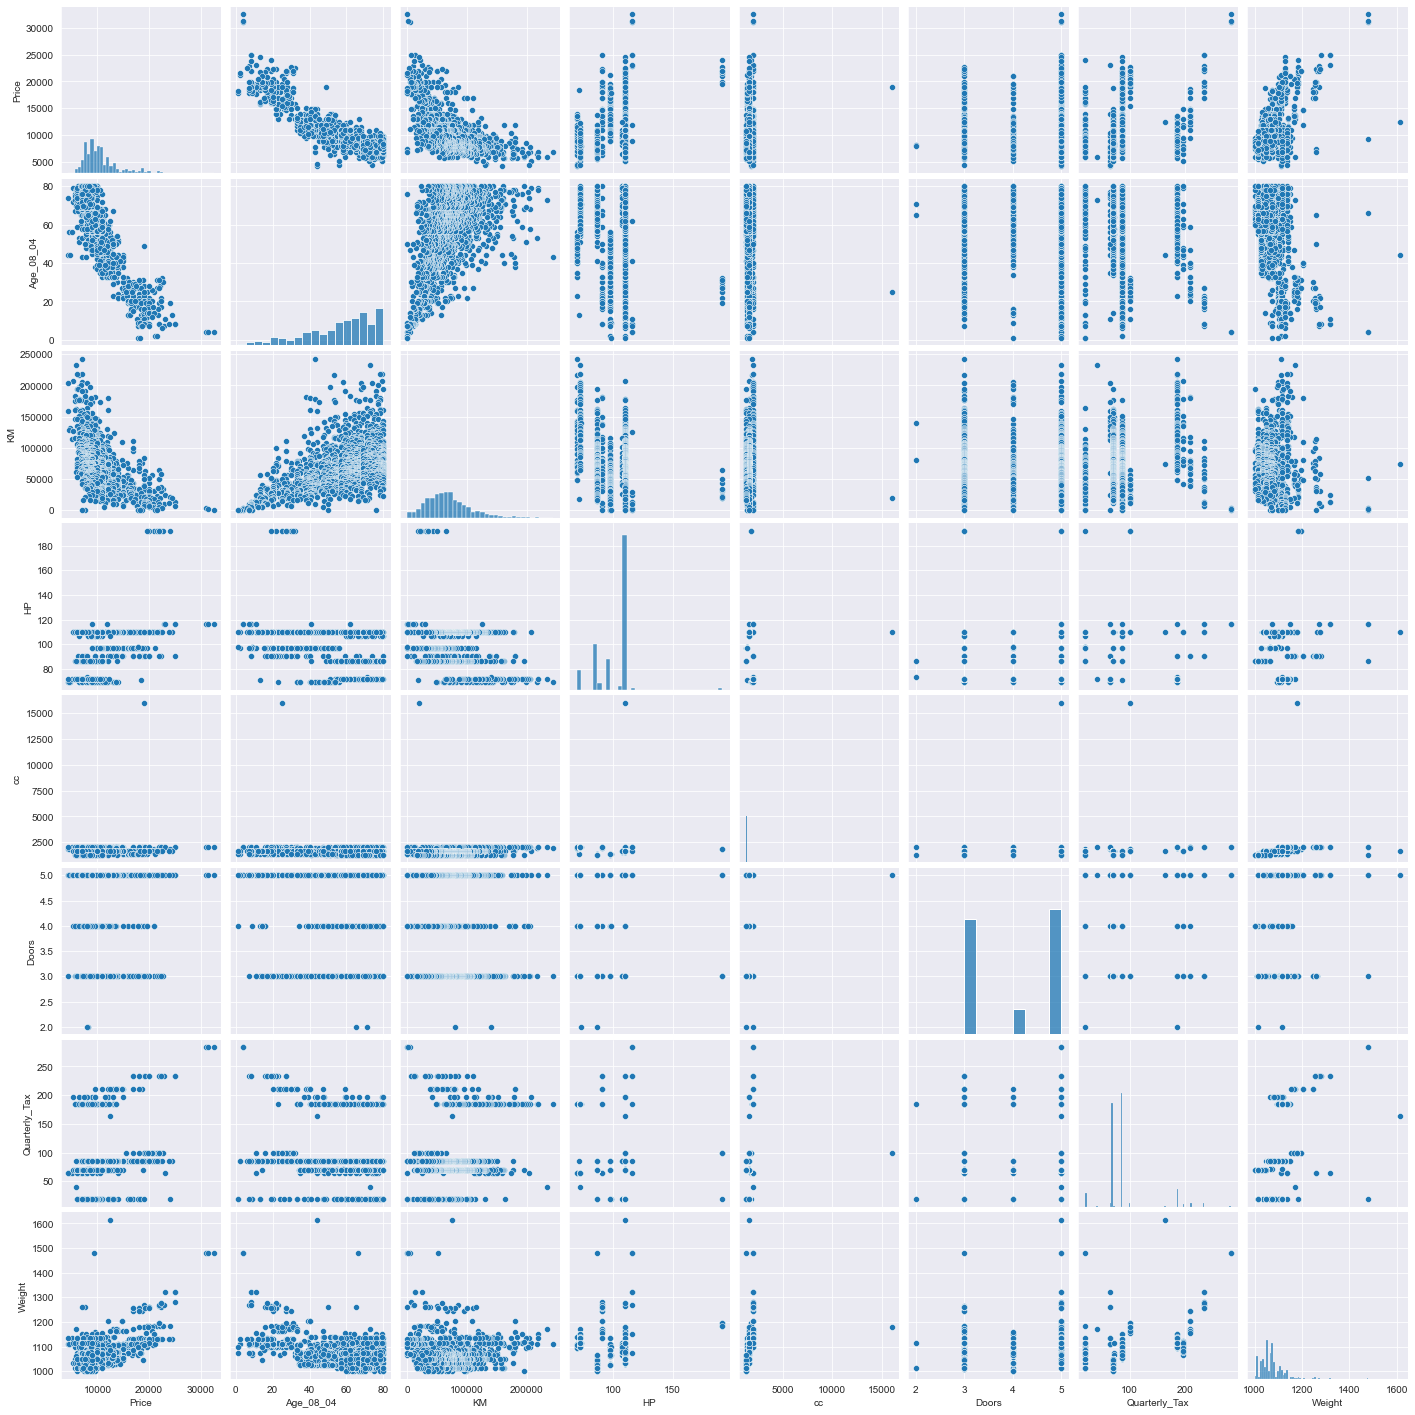

In [23]:
sns.set_style(style = 'darkgrid')
sns.pairplot(toyota1)

In [26]:
X = toyota1.drop('Price', axis = 1).values
y = toyota1.iloc[:, 0].values.reshape(-1,1)
X

array([[   23, 46986,    90, ...,     3,   210,  1165],
       [   23, 72937,    90, ...,     3,   210,  1165],
       [   24, 41711,    90, ...,     3,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     3,    69,  1015],
       [   70, 16916,    86, ...,     3,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [27]:
y

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [29]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1077, 7)
Shape of X_test:  (359, 7)
Shape of y_train:  (1077, 1)
Shape of y_test: (359, 1)


In [30]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7685357693050833
R2_score (train):  0.8630660257565457
R2_score (test):  0.8608373743399096
RMSE:  1405.2904379697131


In [32]:
regressor_linear.rank_

7

In [33]:
regressor_linear.coef_

array([[-1.21272669e+02, -1.99076335e-02,  3.15527811e+01,
        -8.02973989e-02, -4.61544022e+00,  1.98599863e+00,
         1.79150930e+01]])

In [34]:
regressor_linear.intercept_

array([-3532.1180609])

In [36]:
#Price prediction
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
regressor_linear.predict(car_new)
print("The price will be:",regressor_linear.predict(car_new))

The price will be: [[16042.84843318]]


C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Using stats.ols

In [44]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight' , data=toyota).fit()


In [45]:
model.params

Intercept       -2750.555319
Age_08_04        -121.792761
KM                 -0.020534
HP                 33.730630
cc                 -0.125142
Doors             -24.533905
Quarterly_Tax       4.122655
Weight             16.985212
dtype: float64

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:18:57   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age_08_04      -121.7928      2.623    -46.439      0.000    -126.937    -116.648
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print(model.tvalues, '/n', model.pvalues)

Intercept        -2.596110
Age_08_04       -46.438515
KM              -16.395273
HP               12.297412
cc               -1.385318
Doors            -0.622869
Quarterly_Tax     3.141182
Weight           15.860336
dtype: float64 /n Intercept         9.525329e-03
Age_08_04        1.110399e-287
KM                1.744785e-55
HP                4.147049e-33
cc                1.661716e-01
Doors             5.334699e-01
Quarterly_Tax     1.717209e-03
Weight            2.649788e-52
dtype: float64


In [48]:
(model.rsquared,model.rsquared_adj)

(0.8628943128267853, 0.8622222261249558)

## Calculating VIF

In [49]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota1).fit().rsquared  
vif_age = 1/(1-rsq_age) # 1.88

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota1).fit().rsquared  
vif_km = 1/(1-rsq_km) #  1.76

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Quarterly_Tax+Weight',data=toyota1).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  1.42

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Quarterly_Tax+Weight',data=toyota1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 1.16

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=toyota1).fit().rsquared  
vif_doors = 1/(1-rsq_doors) #  1.16

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Weight',data=toyota1).fit().rsquared  
vif_tax = 1/(1-rsq_tax) #  2.31

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax',data=toyota1).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  2.52

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884073
1,KM,1.747016
2,HP,1.336884
3,cc,1.163636
4,Doors,1.114850
5,Quarterly_Tax,2.306970
6,Weight,2.516248


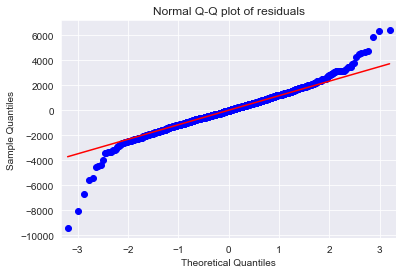

In [50]:
# Q-Q Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [51]:
def a( vals ):
    return (vals - vals.mean())/vals.std()

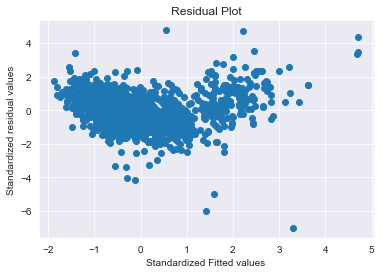

In [52]:
plt.scatter(a(model.fittedvalues),
           a(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

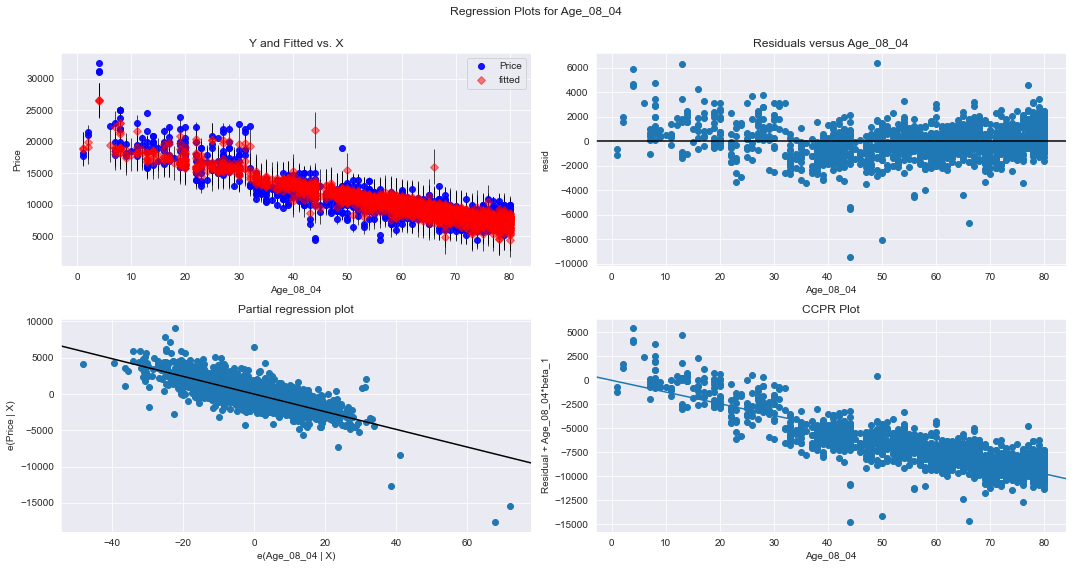

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

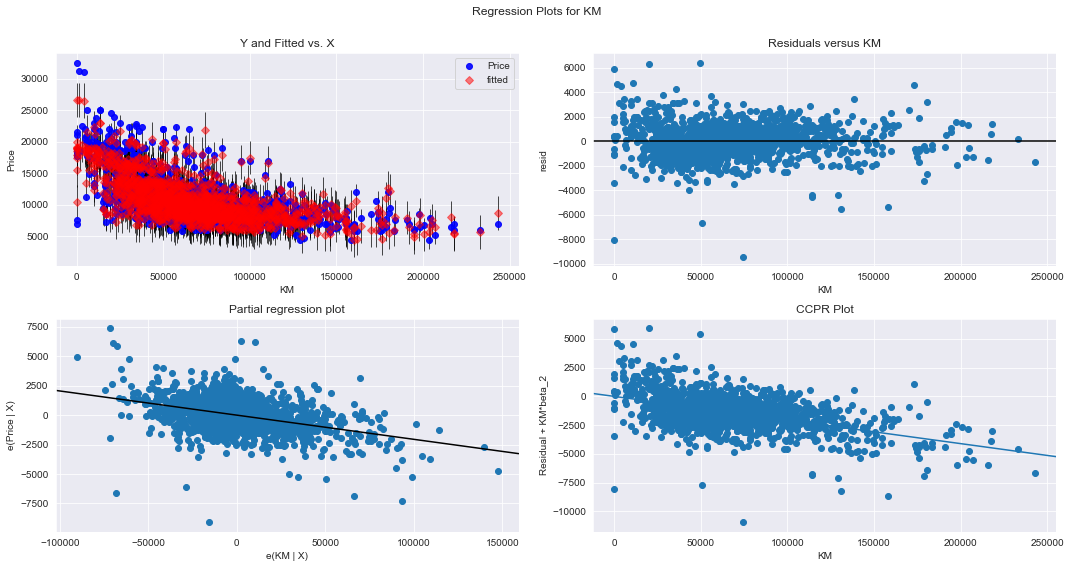

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

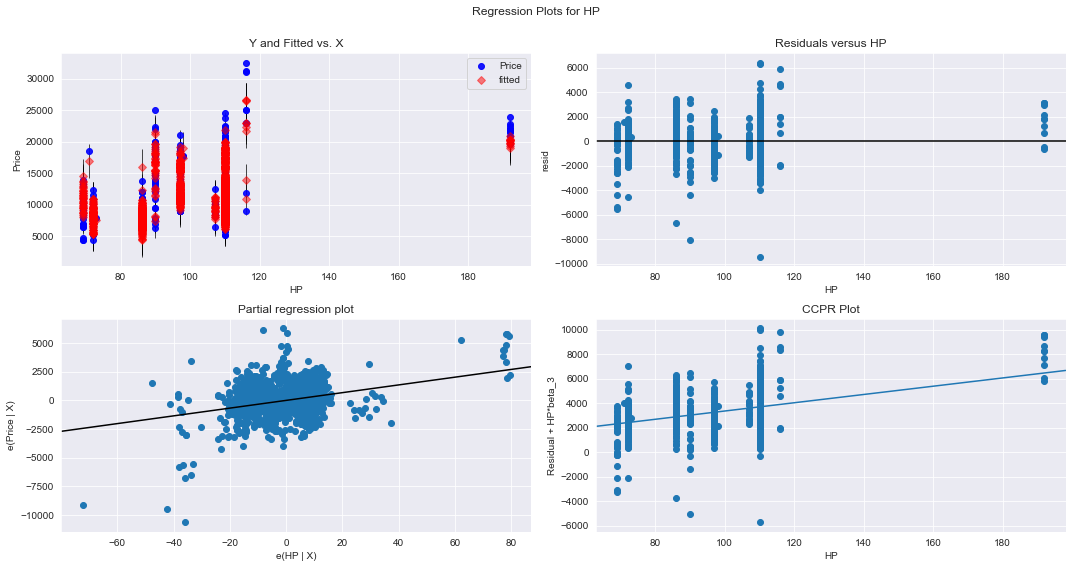

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

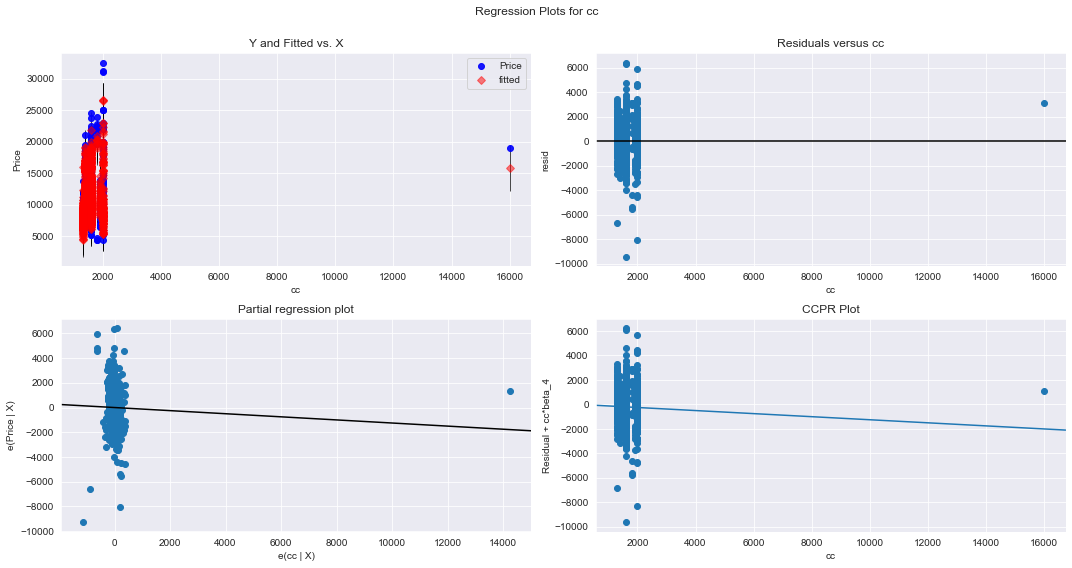

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

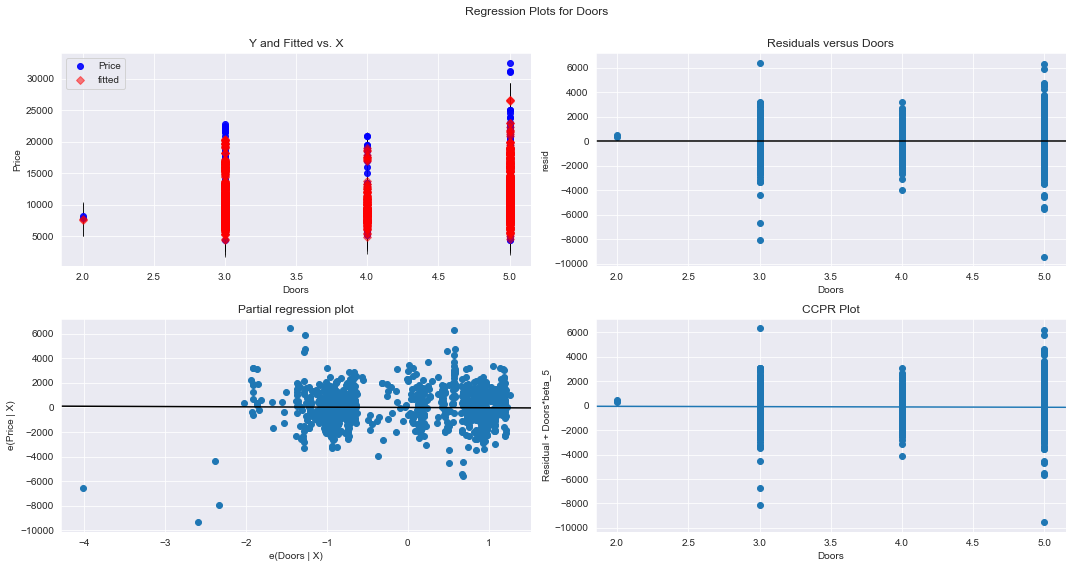

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

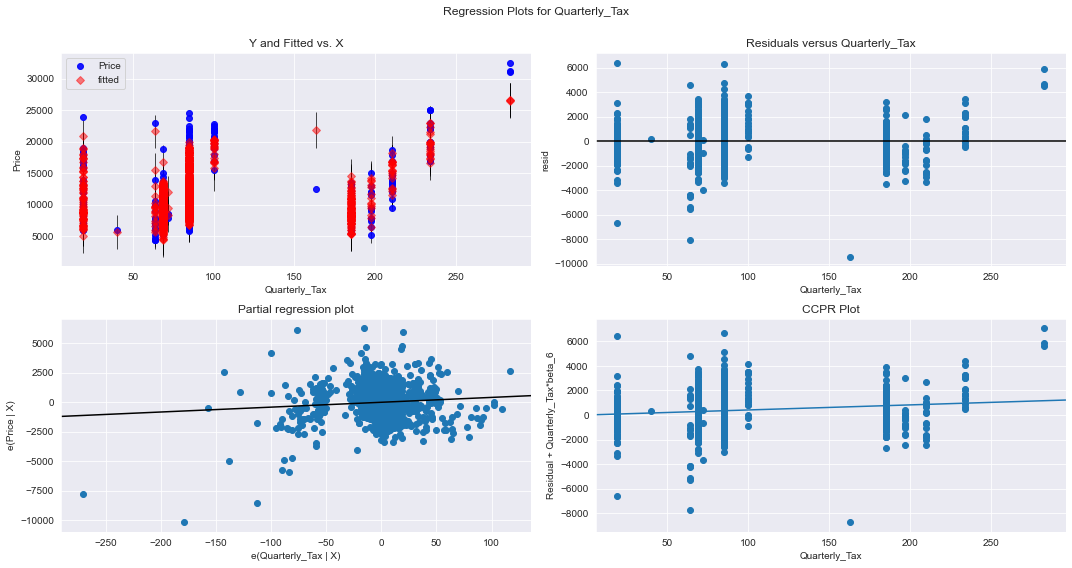

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

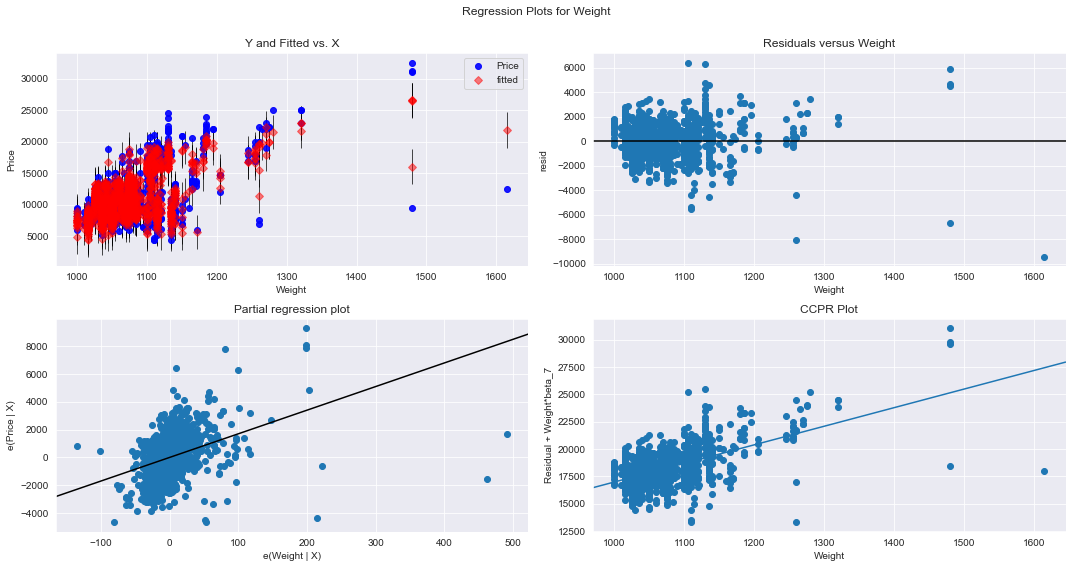

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Detecting Outliers

In [21]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

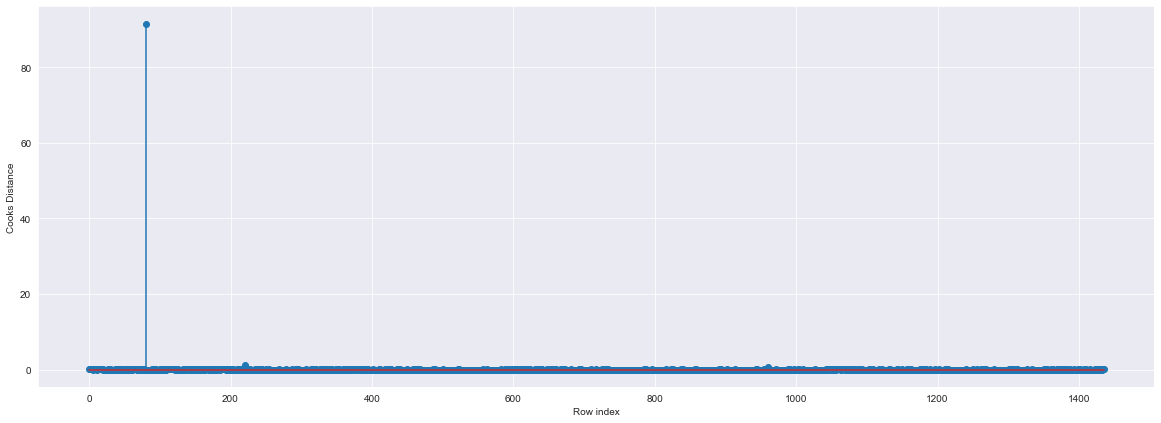

In [23]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
np.argmax(c), np.max(c)

(80, 91.60492711468393)

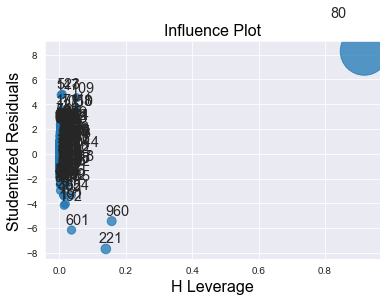

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

## Improving the Model

In [26]:
toyota_new = toyota1
toyota_new

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,69,1025
1432,10845,72,19000,86,1300,3,69,1015
1433,8500,71,17016,86,1300,3,69,1015
1434,7250,70,16916,86,1300,3,69,1015


In [29]:
toyota2=toyota_new.drop(toyota_new.index[80],axis=0).reset_index()

In [30]:
toyota2=toyota1.drop(['index'],axis=1)

In [31]:
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,69,1025
1431,10845,72,19000,86,1300,3,69,1015
1432,8500,71,17016,86,1300,3,69,1015
1433,7250,70,16916,86,1300,3,69,1015


In [32]:
final_ml= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data = toyota2).fit()

In [34]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1349.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:33:16   Log-Likelihood:                -12338.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3811.9846   1043.223     -3.654      0.000   -5858.400   -1765.569
Age_08_04      -120.5554      2.567    -46.961      0.000    -125.591    -115.520
KM               -0.0176      0.001    -13.761      0.000      -0.020      -0.015
HP               41.2637      2.831     14.577      0.000      35.711      46.816
cc               -2.5635      0.308     -8.334      0.000      -3.167      -1.960
Doors           -47.7725     38.592     -1.238      0.216    -123.475      27.930
Quarterly_Tax     9.2725      1.425      6.505      0.000       6.476      12.069
Weight           20.2365      1.118     18.104      0.000      18.044      22.429
==============================================================================
Omnibus:                      251.507   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.218
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       9.711   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pred = final_ml.predict(toyota2)
pred

0       16556.651392
1       16101.080691
2       16528.698834
3       16177.184491
4       15962.918531
            ...     
1430     8964.139096
1431     8427.212626
1432     8582.597179
1433     8704.908048
1434     9944.055869
Length: 1435, dtype: float64

In [36]:
pd.DataFrame({'Original':data, 'Predictions':pred})

,Original,Predictions
0,13500,16556.651392
1,13750,16101.080691
2,13950,16528.698834
3,14950,16177.184491
4,13750,15962.918531
...,...,...
1431,7500,8427.212626
1432,10845,8582.597179
1433,8500,8704.908048
1434,7250,9944.055869


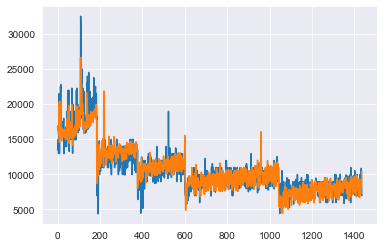

In [38]:
# Actual Vs Prediction Graph
plt.plot(toyota.Price)
plt.plot(model.predict(toyota2))
plt.show()